In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
from dateutil.parser import parse
import impute as imp


# Test year 

In [16]:
fecha1=parse('2018-01-06')-pd.Timedelta('5D')
fecha2=parse('2018-01-06')
isteps=144*5
print(fecha1)
print(fecha2)
tmx_inc=pd.read_csv('../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv',index_col=0,parse_dates=True)
path_imputed_file='../01_weather_data/03_imputing_process/02_imputed_data/Tmx_SARIMA_0_1_1_multioneshot.csv'
#uncomment the next line if you have change path_imputed_file name
# tmx_inc.to_csv(path_imputed_file) #original data that will be replaced with predicted data
for day in range(360):
    train_data=tmx_inc.Ig.loc[fecha1:fecha2]
    train_data = train_data.asfreq(pd.infer_freq(train_data.index)) #5 days prior are for fitting SARIMA
    my_order = (0,0,0)
    my_seasonal_order =(0, 1, 1, 144) #(2, 0, 1, 144)
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    start = time()
    model_fit = model.fit()
    end = time()
    print('training_time:', end-start)
    print(model_fit.summary())
    predictions = model_fit.forecast(steps=144) #Forecat is done for the next day after fecha2
    predictions = np.array(predictions)
    nombres=['time','Ib','Ig','To','RH','WS','WD','P','Eg']
    #Exporting the predicted day to the imputed file 
    imputed=imp.exporta(path_imputed_file,'Ig',predictions,isteps,144,
                        nombres,path_exported_file=path_imputed_file,save=False) 
    #If you want to make a prediction file change, turn save=False to True
    isteps=isteps+144
    fecha1=fecha1+pd.Timedelta('1D')
    fecha2=fecha2+pd.Timedelta('1D') #Add a day, so the next day is predicted
    print('fecha1:',fecha1)
    print('fecha2:',fecha2)

2018-01-01 00:00:00
2018-01-06 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02521D+00    |proj g|=  2.13679D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.293D-08   3.014D+00
  F =   3.0143416971858050     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 6.76540470123291
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-02 00:00:00
fecha2: 2018-01-07 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19025D+00    |proj g|=  1.73797D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   1.081D-06   3.179D+00
  F =   3.1793805068932119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 8.349189758300781
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2292.333
Date:                             Tue, 02 Nov 2021   AIC                           4586.667
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-03 00:00:00
fecha2: 2018-01-08 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15676D+00    |proj g|=  1.81236D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   7.601D-07   3.146D+00
  F =   3.1458978488852227     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 8.002339124679565
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-04 00:00:00
fecha2: 2018-01-09 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11990D+00    |proj g|=  1.89794D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.861D-07   3.109D+00
  F =   3.1090373335951811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 7.8013129234313965
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2241.616
Date:                             Tue, 02 Nov 2021   AIC                           4485.232
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-05 00:00:00
fecha2: 2018-01-10 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89682D+00    |proj g|=  2.50931D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   3.201D-06   2.886D+00
  F =   2.8859564118847225     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 7.789849042892456
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2080.775
Date:                             Tue, 02 Nov 2021   AIC                           4163.549
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-06 00:00:00
fecha2: 2018-01-11 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *


 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29513D+00    |proj g|=  5.32899D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   1.391D-07   2.284D+00
  F =   2.2842634379706852     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 7.378592014312744
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SA

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-07 00:00:00
fecha2: 2018-01-12 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *


 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.28039D+00    |proj g|=  5.42824D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   4.534D-08   2.270D+00
  F =   2.2695182840984414     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 7.481474876403809
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SA

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-08 00:00:00
fecha2: 2018-01-13 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.29719D+00    |proj g|=  5.31525D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      5      1     0     0   1.144D-07   2.286D+00
  F =   2.2863264167010380     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 8.211017847061157
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -1648.441
Date:                             Tue, 02 Nov 2021   AIC                           3298.883
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-09 00:00:00
fecha2: 2018-01-14 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34442D+00    |proj g|=  5.01017D-02


 This problem is unconstrained.



At iterate    5    f=  2.33355D+00    |proj g|=  6.60973D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      6      1     0     0   6.610D-06   2.334D+00
  F =   2.3335529995262876     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 15.752192974090576
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -1682.492
Date:                             Tue, 02 Nov 2021 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-10 00:00:00
fecha2: 2018-01-15 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *


 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90629D+00    |proj g|=  2.47973D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   1.754D-06   2.895D+00
  F =   2.8954274784943439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.443388223648071
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             S

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-11 00:00:00
fecha2: 2018-01-16 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16870D+00    |proj g|=  1.78549D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   8.747D-07   3.158D+00
  F =   3.1578319262142651     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.834768772125244
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2276.797
Date:                             Tue, 02 Nov 2021   AIC                           4555.594
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-12 00:00:00
fecha2: 2018-01-17 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20543D+00    |proj g|=  1.70526D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   1.203D-06   3.195D+00
  F =   3.1945605667649408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.77700400352478
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2303.278
Date:                             Tue, 02 Nov 2021   AIC                           4608.556
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-13 00:00:00
fecha2: 2018-01-18 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91622D+00    |proj g|=  7.00470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.732D-06   3.905D+00
  F =   3.9053517209403354     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.41057825088501
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-14 00:00:00
fecha2: 2018-01-19 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22298D+00    |proj g|=  4.77120D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.514D-06   4.212D+00
  F =   4.2121136494014539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.363723039627075
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3036.934
Date:                             Tue, 02 Nov 2021   AIC                           6075.868
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-15 00:00:00
fecha2: 2018-01-20 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40690D+00    |proj g|=  3.79007D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.950D-06   4.396D+00
  F =   4.3960295622178185     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.787479162216187
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3169.537
Date:                             Tue, 02 Nov 2021   AIC                           6341.075
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-16 00:00:00
fecha2: 2018-01-21 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49143D+00    |proj g|=  3.40950D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.640D-06   4.481D+00
  F =   4.4805680975360422     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.409773111343384
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3230.490
Date:                             Tue, 02 Nov 2021   AIC                           6462.979
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-17 00:00:00
fecha2: 2018-01-22 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42639D+00    |proj g|=  3.69869D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.884D-06   4.416D+00
  F =   4.4155277670924624     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.497837781906128
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-18 00:00:00
fecha2: 2018-01-23 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31536D+00    |proj g|=  4.25017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.256D-06   4.304D+00
  F =   4.3044977207883539     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.679056167602539
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-19 00:00:00
fecha2: 2018-01-24 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13232D+00    |proj g|=  5.34459D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.697D-06   4.121D+00
  F =   4.1214492348180825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.112307071685791
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2971.565
Date:                             Tue, 02 Nov 2021   AIC                           5945.130
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-20 00:00:00
fecha2: 2018-01-25 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05430D+00    |proj g|=  5.89288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.781D-06   4.043D+00
  F =   4.0434300216829042     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.976529359817505
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-21 00:00:00
fecha2: 2018-01-26 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30187D+00    |proj g|=  4.32257D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.296D-06   4.291D+00
  F =   4.2910033117387201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.950255155563354
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3093.813
Date:                             Tue, 02 Nov 2021   AIC                           6189.627
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-22 00:00:00
fecha2: 2018-01-27 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57119D+00    |proj g|=  3.08558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.336D-06   4.560D+00
  F =   4.5603184651808757     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.840283870697021
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-23 00:00:00
fecha2: 2018-01-28 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68378D+00    |proj g|=  2.67996D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.890D-06   4.673D+00
  F =   4.6729102045869535     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.45696496963501
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-24 00:00:00
fecha2: 2018-01-29 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69761D+00    |proj g|=  2.63396D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.834D-06   4.687D+00
  F =   4.6867432894678558     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.63947606086731
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3379.142
Date:                             Tue, 02 Nov 2021   AIC                           6760.284
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-25 00:00:00
fecha2: 2018-01-30 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67249D+00    |proj g|=  2.71811D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.935D-06   4.662D+00
  F =   4.6616200563393146     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.63383412361145
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3361.028
Date:                             Tue, 02 Nov 2021   AIC                           6724.056
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-26 00:00:00
fecha2: 2018-01-31 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58749D+00    |proj g|=  3.02323D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.271D-06   4.577D+00
  F =   4.5766242684779419     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.930500030517578
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3299.746
Date:                             Tue, 02 Nov 2021   AIC                           6601.492
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-27 00:00:00
fecha2: 2018-02-01 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57459D+00    |proj g|=  3.07244D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.321D-06   4.564D+00
  F =   4.5637257462185845     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.42729115486145
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3290.446
Date:                             Tue, 02 Nov 2021   AIC                           6582.893
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-28 00:00:00
fecha2: 2018-02-02 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63789D+00    |proj g|=  2.83839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.072D-06   4.627D+00
  F =   4.6270259498730741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.530574083328247
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-29 00:00:00
fecha2: 2018-02-03 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62538D+00    |proj g|=  2.88321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.121D-06   4.615D+00
  F =   4.6145098264172448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.164610147476196
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-30 00:00:00
fecha2: 2018-02-04 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53302D+00    |proj g|=  3.23656D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.483D-06   4.522D+00
  F =   4.5221530428143550     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.311361074447632
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3260.472
Date:                             Tue, 02 Nov 2021   AIC                           6522.945
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-01-31 00:00:00
fecha2: 2018-02-05 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43656D+00    |proj g|=  3.65192D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.845D-06   4.426D+00
  F =   4.4256933936531340     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.559754848480225
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3190.925
Date:                             Tue, 02 Nov 2021   AIC                           6383.850
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-01 00:00:00
fecha2: 2018-02-06 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.49955D+00    |proj g|=  3.37502D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.611D-06   4.489D+00
  F =   4.4886873686678701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.378225088119507
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3236.344
Date:                             Tue, 02 Nov 2021   AIC                           6474.687
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-02 00:00:00
fecha2: 2018-02-07 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41759D+00    |proj g|=  3.73968D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.913D-06   4.407D+00
  F =   4.4067214007127724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.337086915969849
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3177.246
Date:                             Tue, 02 Nov 2021   AIC                           6356.492
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-03 00:00:00
fecha2: 2018-02-08 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.68544D+00    |proj g|=  2.67439D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.883D-06   4.675D+00
  F =   4.6745724105940978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.175369262695312
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3370.367
Date:                             Tue, 02 Nov 2021   AIC                           6742.733
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-04 00:00:00
fecha2: 2018-02-09 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80290D+00    |proj g|=  2.30872D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.421D-06   4.792D+00
  F =   4.7920320991870931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.974036931991577
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3455.055
Date:                             Tue, 02 Nov 2021   AIC                           6912.110
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-05 00:00:00
fecha2: 2018-02-10 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78603D+00    |proj g|=  2.35799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.487D-06   4.775D+00
  F =   4.7751643774040540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.62531304359436
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-06 00:00:00
fecha2: 2018-02-11 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.86474D+00    |proj g|=  2.13675D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.183D-06   4.854D+00
  F =   4.8538721563915628     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.578764915466309
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3499.642
Date:                             Tue, 02 Nov 2021   AIC                           7001.284
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-07 00:00:00
fecha2: 2018-02-12 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80854D+00    |proj g|=  2.29247D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.399D-06   4.798D+00
  F =   4.7976759615785962     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.564227819442749
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-08 00:00:00
fecha2: 2018-02-13 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71022D+00    |proj g|=  2.59272D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.784D-06   4.699D+00
  F =   4.6993486650849947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.315428256988525
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3388.230
Date:                             Tue, 02 Nov 2021   AIC                           6778.461
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-09 00:00:00
fecha2: 2018-02-14 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66767D+00    |proj g|=  2.73453D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   4.954D-06   4.657D+00
  F =   4.6568064853983175     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.394370079040527
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3357.557
Date:                             Tue, 02 Nov 2021   AIC                           6717.115
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-10 00:00:00
fecha2: 2018-02-15 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61648D+00    |proj g|=  2.91550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.157D-06   4.606D+00
  F =   4.6056142232083639     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.853482007980347
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-11 00:00:00
fecha2: 2018-02-16 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45127D+00    |proj g|=  3.58530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.790D-06   4.440D+00
  F =   4.4404027999918334     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.064388275146484
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-12 00:00:00
fecha2: 2018-02-17 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31819D+00    |proj g|=  4.23515D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.244D-06   4.307D+00
  F =   4.3073252859566677     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.042097091674805
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3105.582
Date:                             Tue, 02 Nov 2021   AIC                           6213.163
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-13 00:00:00
fecha2: 2018-02-18 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10088D+00    |proj g|=  5.55907D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.749D-06   4.090D+00
  F =   4.0900180978307983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.521075963973999
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-14 00:00:00
fecha2: 2018-02-19 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64244D+00    |proj g|=  9.86787D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.612D-06   3.632D+00
  F =   3.6315702210292256     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.446454048156738
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2618.362
Date:                             Tue, 02 Nov 2021   AIC                           5238.724
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-15 00:00:00
fecha2: 2018-02-20 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.79856D+00    |proj g|=  8.11618D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.415D-06   3.788D+00
  F =   3.7876924645741448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.126994848251343
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-16 00:00:00
fecha2: 2018-02-21 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00708D+00    |proj g|=  6.25165D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.807D-06   3.996D+00
  F =   3.9962157241282963     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.907941102981567
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-17 00:00:00
fecha2: 2018-02-22 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00641D+00    |proj g|=  6.25695D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.803D-06   3.996D+00
  F =   3.9955392989303014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.28345799446106
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2880.784
Date:                             Tue, 02 Nov 2021   AIC                           5763.568
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-18 00:00:00
fecha2: 2018-02-23 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00095D+00    |proj g|=  6.29981D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.797D-06   3.990D+00
  F =   3.9900851292022299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.118706226348877
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2876.851
Date:                             Tue, 02 Nov 2021   AIC                           5755.703
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-19 00:00:00
fecha2: 2018-02-24 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74583D+00    |proj g|=  8.66995D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.211D-06   3.735D+00
  F =   3.7349631354820239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.136777877807617
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2692.908
Date:                             Tue, 02 Nov 2021   AIC                           5387.817
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-20 00:00:00
fecha2: 2018-02-25 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.06258D+00    |proj g|=  2.03915D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   2.664D-07   3.052D+00
  F =   3.0517086684940682     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.861993074417114
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2200.282
Date:                             Tue, 02 Nov 2021   AIC                           4402.564
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-21 00:00:00
fecha2: 2018-02-26 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41087D+00    |proj g|=  1.31859D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   3.440D-06   3.400D+00
  F =   3.4000007740187121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.650346994400024
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2451.401
Date:                             Tue, 02 Nov 2021   AIC                           4904.801
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-22 00:00:00
fecha2: 2018-02-27 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.57943D+00    |proj g|=  1.06777D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.101D-06   3.569D+00
  F =   3.5685595974309865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.022794008255005
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2572.931
Date:                             Tue, 02 Nov 2021   AIC                           5147.863
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-23 00:00:00
fecha2: 2018-02-28 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72659D+00    |proj g|=  8.88134D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.113D-06   3.716D+00
  F =   3.7157189543746045     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.853063821792603
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-24 00:00:00
fecha2: 2018-03-01 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74213D+00    |proj g|=  8.71018D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.188D-06   3.731D+00
  F =   3.7312646293706164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.793594121932983
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2690.242
Date:                             Tue, 02 Nov 2021   AIC                           5382.484
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-25 00:00:00
fecha2: 2018-03-02 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61941D+00    |proj g|=  1.01565D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.422D-06   3.609D+00
  F =   3.6085407550591082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 13.089680910110474
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-26 00:00:00
fecha2: 2018-03-03 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43965D+00    |proj g|=  1.27193D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   3.750D-06   3.429D+00
  F =   3.4287840754116679     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.60722804069519
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2472.153
Date:                             Tue, 02 Nov 2021   AIC                           4946.307
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-27 00:00:00
fecha2: 2018-03-04 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96146D+00    |proj g|=  2.31428D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   1.144D-06   2.951D+00
  F =   2.9505911263238978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 10.33373498916626
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2127.376
Date:                             Tue, 02 Nov 2021   AIC                           4256.752
Time:                 

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-02-28 00:00:00
fecha2: 2018-03-05 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52628D+00    |proj g|=  3.99011D-02


 This problem is unconstrained.



At iterate    5    f=  2.51542D+00    |proj g|=  3.84892D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      6      1     0     0   3.849D-07   2.515D+00
  F =   2.5154169946946703     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.21051812171936
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -1813.616
Date:                             Tue, 02 Nov 2021  

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-01 00:00:00
fecha2: 2018-03-06 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.63465D+00    |proj g|=  3.48397D-02


 This problem is unconstrained.



At iterate    5    f=  2.62378D+00    |proj g|=  5.48894D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      5      6      1     0     0   5.489D-08   2.624D+00
  F =   2.6237843502554439     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.95602798461914
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -1891.749
Date:                             Tue, 02 Nov 2021  

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-02 00:00:00
fecha2: 2018-03-07 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88130D+00    |proj g|=  2.55854D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      4      1     0     0   6.393D-06   2.870D+00
  F =   2.8704326621546299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 10.332591772079468
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2069.582
Date:                             Tue, 02 Nov 2021   AIC                           4141.164
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-03 00:00:00
fecha2: 2018-03-08 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72441D+00    |proj g|=  8.90559D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.099D-06   3.714D+00
  F =   3.7135401327886979     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.072516918182373
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-04 00:00:00
fecha2: 2018-03-09 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03020D+00    |proj g|=  6.07336D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.793D-06   4.019D+00
  F =   4.0193303796255702     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.758103132247925
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2897.937
Date:                             Tue, 02 Nov 2021   AIC                           5797.874
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-05 00:00:00
fecha2: 2018-03-10 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20616D+00    |proj g|=  4.87271D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.551D-06   4.195D+00
  F =   4.1952957930791657     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 14.160969018936157
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3024.808
Date:                             Tue, 02 Nov 2021   AIC                           6051.617
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-06 00:00:00
fecha2: 2018-03-11 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39515D+00    |proj g|=  3.84621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.993D-06   4.384D+00
  F =   4.3842814923625975     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.81020712852478
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-07 00:00:00
fecha2: 2018-03-12 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46637D+00    |proj g|=  3.51815D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.736D-06   4.456D+00
  F =   4.4555057218424343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.938362121582031
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3212.420
Date:                             Tue, 02 Nov 2021   AIC                           6426.839
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-08 00:00:00
fecha2: 2018-03-13 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39758D+00    |proj g|=  3.83452D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   5.983D-06   4.387D+00
  F =   4.3867154522816953     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.594090938568115
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3162.822
Date:                             Tue, 02 Nov 2021   AIC                           6327.644
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-09 00:00:00
fecha2: 2018-03-14 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30383D+00    |proj g|=  4.31200D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.288D-06   4.293D+00
  F =   4.2929590212264825     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 12.032443046569824
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -3095.223
Date:                             Tue, 02 Nov 2021   AIC                           6192.447
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-10 00:00:00
fecha2: 2018-03-15 00:00:00


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04538D+00    |proj g|=  5.95901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   6.790D-06   4.035D+00
  F =   4.0345155596706368     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 11.736634969711304
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observation

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-11 00:00:00
fecha2: 2018-03-16 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41181D+00    |proj g|=  1.31704D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   3.445D-06   3.401D+00
  F =   3.4009426858145124     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 15.4546959400177
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2452.080
Date:                             Tue, 02 Nov 2021   AIC                           4906.159
Time:                  

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-12 00:00:00
fecha2: 2018-03-17 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41708D+00    |proj g|=  1.30837D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   3.504D-06   3.406D+00
  F =   3.4062165036402865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
training_time: 10.824512004852295
                                      SARIMAX Results                                      
Dep. Variable:                                  Ig   No. Observations:                  721
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 144)   Log Likelihood               -2455.882
Date:                             Tue, 02 Nov 2021   AIC                           4913.764
Time:                

/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


fecha1: 2018-03-13 00:00:00
fecha2: 2018-03-18 00:00:00
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36960D+00    |proj g|=  1.38850D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   2.983D-06   3.359D+00
  F =   3.3587300898111612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


KeyboardInterrupt: 

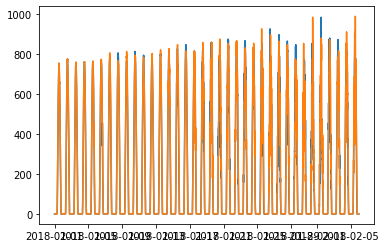

In [33]:
fig, ax=plt.subplots(figsize=(20,10))
plt.plot(pd.read_csv(path_imputed_file,index_col=0,parse_dates=True).Ig.loc['1-1-18':'2-5-18'])
plt.plot(tmx_inc.Ig.loc['1-1-18':'2-5-18'])